# SIR epidemic model

## Part 1. Basic SIR model describing the course of an epidemic.

S - compartment of healthy people who can become infected,

I - compartment of infected people who can recover,

R - compartment of people who have recovered and cannot become infected again, do not infect others.

The model starts with a society of 40 million people, 100 people become infected. The model describes the infectious disease of whooping cough, caused by the bacterium 'Bordetella pertussis'. Thanks to it, we can analyze the rate of the epidemic. In this case, it is approximately 7 days.

$\beta$ the rate of infection, $\gamma$ the rate of recovery.

$dS=\frac{-\beta*S*I}{N_{pop}}$

$dI=\frac{\beta*S*I}{N_{pop}}-\gamma*I$

$dR=\gamma*I$

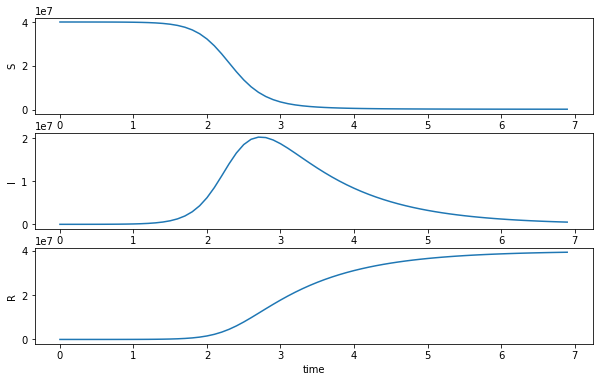

In [1]:
import matplotlib.pyplot  as plt
from numpy import array,zeros,arange

def SIR(state,t):
    S=state[0]
    I=state[1]
    R=state[2]
    ds=-beta*S*I/Npop 
    di=beta*S*I/Npop-gamma*I
    dr=gamma*I 

    return array([ds,di,dr])



def Runge_Kutta(y,t,dt,derivative):
    k1=dt*derivative(y,t)
    k2=dt*derivative(y+k1/2.,t+0.5*dt)
    k3=dt*derivative(y+k2/2.,t+0.5*dt)
    k4=dt*derivative(y+k3,t+dt)
    y_next=y+1/6.*(k1+2*k2+2*k3+k4)
    return y_next

global alfa,beta,gamma,Npop

beta=5.5
gamma=1
Npop=4*10**7
Io=10**3  # initial conditions
So=Npop-Io 
Ro=0
dt=0.1
to=0
te=7

t=arange(to,te,dt)
N=len(t)
y=zeros([N,3])
y[0,0]=So
y[0,1]=Io
y[0,2]=Ro


for i in range(N-1):
    y[i+1]=Runge_Kutta(y[i],t[i],dt,SIR)

St=[y[j,0] for j in range(N)]
It=[y[j,1] for j in range(N)]
Rt=[y[j,2] for j in range(N)]

plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.plot(t,St)
plt.ylabel("S")
plt.xlabel("time")
plt.subplot(3,1,2)
plt.plot(t,It)
plt.ylabel("I")
plt.xlabel("time")
plt.subplot(3,1,3)
plt.plot(t,Rt)
plt.ylabel("R")
plt.xlabel("time")

plt.show()


## Part 2. Model analysis in terms of the R parameter (incidence rate).

$R=\frac{\beta}{\gamma}$

In the case of R> 1 the epidemic will break out, the number of patients increases rapidly and reaches a maximum on day 2. 

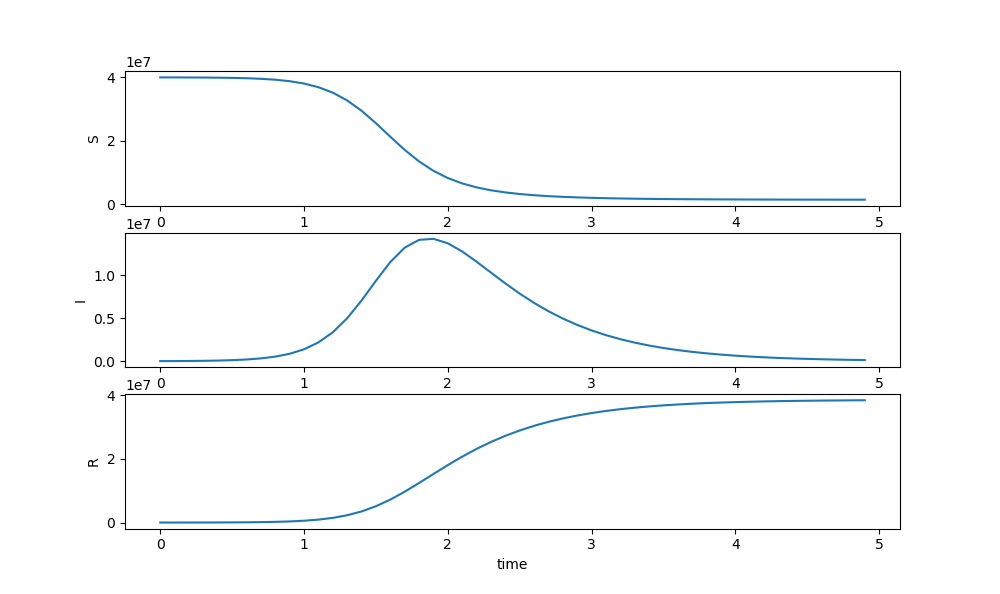

In the case of R <1, the number of patients is highest in the initial conditions, then it decreases and expires during the day.

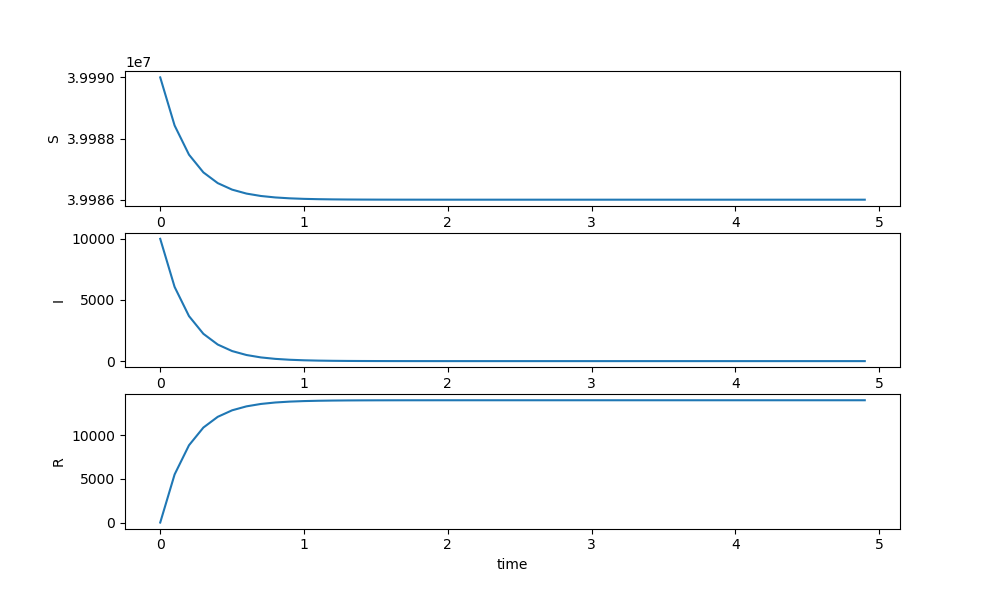

## Part 3. Analysis of the effect of the vaccine on epidemia.

The vaccine can have a decisive influence on the course of the epidemic. I introduced it into the SIR model as an additional 
$\alpha$ factor that carries people from S to R. The vaccinated cannot become infected or contagious.

$dS=\frac{-\beta*S*I}{N_{pop}} - \alpha*S$

$dI=\frac{\beta*S*I}{N_{pop}} - \gamma*I$

$dR=\gamma*I + \alpha*S$

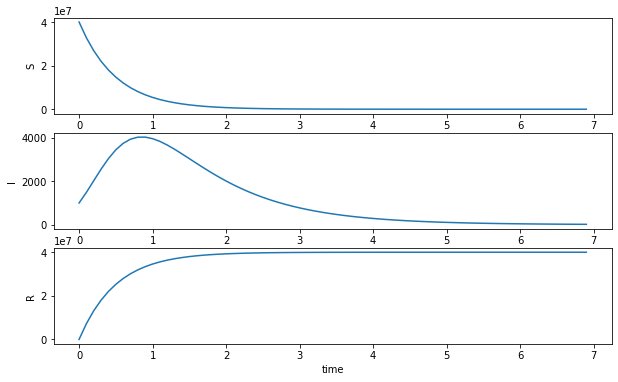

In [2]:
import matplotlib.pyplot  as plt
from numpy import array,zeros,arange

def SIR(state,t):
    S=state[0]
    I=state[1]
    R=state[2]
    ds=-beta*S*I/Npop -alfa*S
    di=beta*S*I/Npop-gamma*I
    dr=gamma*I + alfa*S

    return array([ds,di,dr])



def Runge_Kutta(y,t,dt,derivative):
    k1=dt*derivative(y,t)
    k2=dt*derivative(y+k1/2.,t+0.5*dt)
    k3=dt*derivative(y+k2/2.,t+0.5*dt)
    k4=dt*derivative(y+k3,t+dt)
    y_next=y+1/6.*(k1+2*k2+2*k3+k4)
    return y_next

global alfa,beta,gamma,Npop
alfa=2 #szczepionka
beta=5.5
gamma=1
Npop=4*10**7
Io=10**3  # initial conditions
So=Npop-Io 
Ro=0
dt=0.1
to=0
te=7

t=arange(to,te,dt)
N=len(t)
y=zeros([N,3])
y[0,0]=So
y[0,1]=Io
y[0,2]=Ro


for i in range(N-1):
    y[i+1]=Runge_Kutta(y[i],t[i],dt,SIR)

St=[y[j,0] for j in range(N)]
It=[y[j,1] for j in range(N)]
Rt=[y[j,2] for j in range(N)]

plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.plot(t,St)
plt.ylabel("S")
plt.xlabel("time")
plt.subplot(3,1,2)
plt.plot(t,It)
plt.ylabel("I")
plt.xlabel("time")
plt.subplot(3,1,3)
plt.plot(t,Rt)
plt.ylabel("R")
plt.xlabel("time")

plt.show()


The impact of the vaccine on the epidemic is significant. In the no-vaccine model, the maximum number of patients occurred on day 3 and that was 20 million people. In the model including the vaccine, the maximum number of patients is 4.000, and the epidemic ends in 5 days.

In order to hasten cease of the epidemic, the vaccination rate should be greater than the rate of infection.

In this case $\alpha > \beta$.

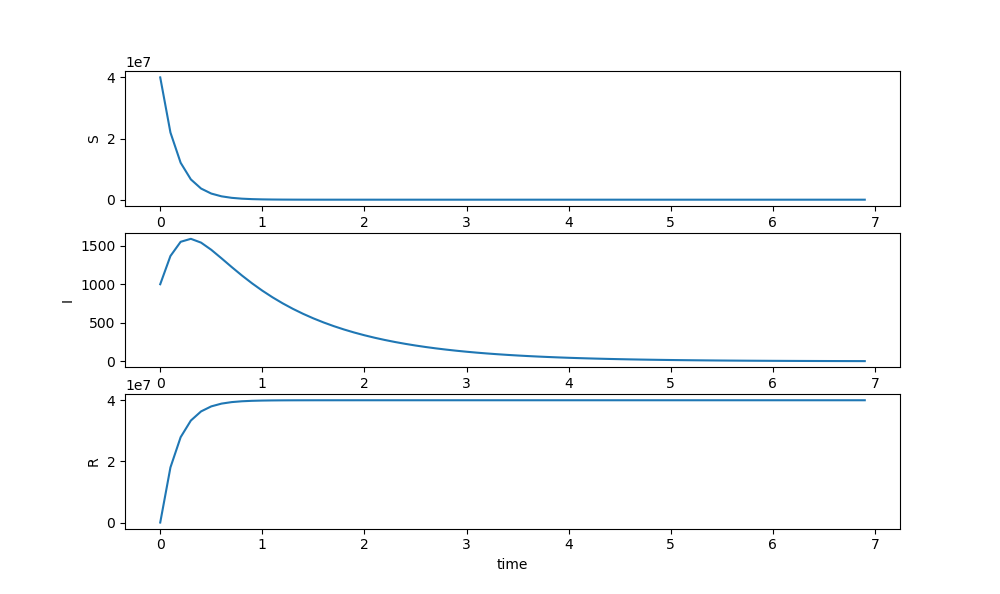

Thanks to the vaccine, the number of people who can get sick drops sharply, making the epidemic last 4 days and the maximum number of cases is 1.5 thousand.

## Part 4. Loss of immunity.

To investigate the impact of loss of immunity of people who have recovered, I introduce an additional $\lambda$ factor. Thanks to it, some people staying in part R are transferred to S and may become infected again. 

$dS=\frac{-\beta*S*I}{N_{pop}} - \alpha*S + \lambda*R$ 

$dI=\frac{\beta*S*I}{N_{pop}} - \gamma*I$

$dR=\gamma*I + \alpha*S - \lambda*R$ 

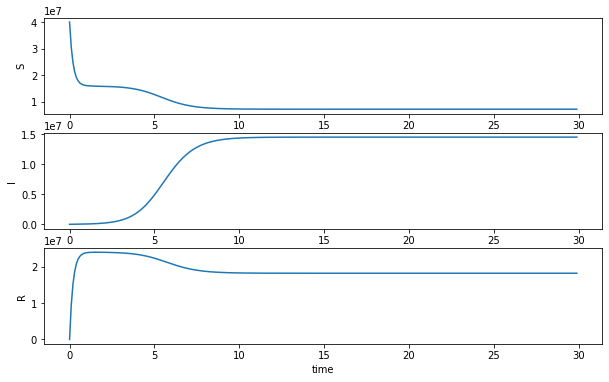

In [3]:
import matplotlib.pyplot  as plt
from numpy import array,zeros,arange

def SIR(state,t):
    S=state[0]
    I=state[1]
    R=state[2]
    ds=-beta*S*I/Npop -alfa*S +lambd*R
    di=beta*S*I/Npop-gamma*I
    dr=gamma*I + alfa*S -lambd*R

    return array([ds,di,dr])



def Runge_Kutta(y,t,dt,derivative):
    k1=dt*derivative(y,t)
    k2=dt*derivative(y+k1/2.,t+0.5*dt)
    k3=dt*derivative(y+k2/2.,t+0.5*dt)
    k4=dt*derivative(y+k3,t+dt)
    y_next=y+1/6.*(k1+2*k2+2*k3+k4)
    return y_next

global alfa,beta,gamma,Npop,lambd
lambd=2 #utrata odpornosci
alfa=3 #szczepionka
beta=5.5
gamma=1
Npop=4*10**7
Io=10**4  # initial conditions
So=Npop-Io 
Ro=0
dt=0.1
to=0
te=30

t=arange(to,te,dt)
N=len(t)
y=zeros([N,3])
y[0,0]=So
y[0,1]=Io
y[0,2]=Ro


for i in range(N-1):
    y[i+1]=Runge_Kutta(y[i],t[i],dt,SIR)

St=[y[j,0] for j in range(N)]
It=[y[j,1] for j in range(N)]
Rt=[y[j,2] for j in range(N)]

plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.plot(t,St)
plt.ylabel("S")
plt.xlabel("time")
plt.subplot(3,1,2)
plt.plot(t,It)
plt.ylabel("I")
plt.xlabel("time")
plt.subplot(3,1,3)
plt.plot(t,Rt)
plt.ylabel("R")
plt.xlabel("time")

plt.show()


We can see in the chart that the epidemic is not dying out. The number of patients increases and stabilizes at the level of 15 million. Due to the loss of immunity, the epidemic remains constant despite continuous vaccination. If vaccination is disabled, 3/4 of the population is infected. For the epidemic to cease, the ratio of the vaccination to immunity loss should be at least 5: 1.

## Part 5. Treatment of the infected.

To analyze the impact of drugs on the course of the epidemic, I introduce an additional interval. IT means infected people who recover faster thanks to drugs and are transferred to part R. I introduce the $\kappa $ factor, which carries infected people to IT, and $ \epsilon $, which works similarly to $ \gamma $, however more effective.

$dS=\frac{-\beta*S*I}{N_{pop}} - \alpha*S + \lambda*R$ 

$dI=\frac{\beta*S*I}{N_{pop}} - \gamma*I - \kappa*I$

$dR=\gamma*I + \alpha*S - \lambda*R + \epsilon*IT$ 

$dIT=\kappa*I - \epsilon*IT$

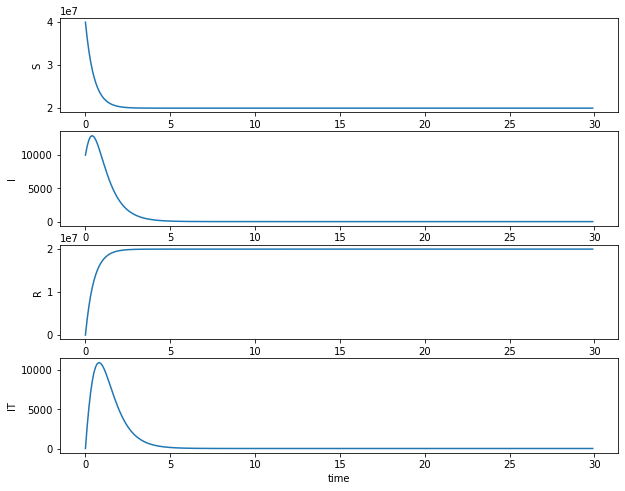

In [4]:
import matplotlib.pyplot  as plt
from numpy import array,zeros,arange

def SIR(state,t):
    S=state[0]
    I=state[1]
    R=state[2]
    IT=state[3]
    ds=-beta*S*I/Npop -alfa*S +lambd*R
    di=beta*S*I/Npop-gamma*I-kappa*I
    dr=gamma*I + alfa*S -lambd*R +epsilon*IT
    dit=kappa*I - epsilon*IT

    return array([ds,di,dr,dit])



def Runge_Kutta(y,t,dt,derivative):
    k1=dt*derivative(y,t)
    k2=dt*derivative(y+k1/2.,t+0.5*dt)
    k3=dt*derivative(y+k2/2.,t+0.5*dt)
    k4=dt*derivative(y+k3,t+dt)
    y_next=y+1/6.*(k1+2*k2+2*k3+k4)
    return y_next

global alfa,beta,gamma,lambd,Npop,kappa,epsilon
kappa=3  
epsilon=3
lambd=1 
alfa=1
beta=5.5
gamma=1 
Npop=4*10**7
Io=10**4 
So=Npop-Io 
Ro=0
dt=0.1
to=0
te=30
ITo=0
t=arange(to,te,dt)
N=len(t)
y=zeros([N,4])
y[0,0]=So
y[0,1]=Io
y[0,2]=Ro
y[0,3]=ITo

for i in range(N-1):
    y[i+1]=Runge_Kutta(y[i],t[i],dt,SIR)

St=[y[j,0] for j in range(N)]
It=[y[j,1] for j in range(N)]
Rt=[y[j,2] for j in range(N)]
ITt=[y[j,3] for j in range(N)]

plt.figure(figsize = (10,8))
plt.subplot(4,1,1)
plt.plot(t,St)
plt.ylabel("S")
plt.xlabel("time")
plt.subplot(4,1,2)
plt.plot(t,It)
plt.ylabel("I")
plt.xlabel("time")
plt.subplot(4,1,3)
plt.plot(t,Rt)
plt.ylabel("R")
plt.xlabel("time")
plt.subplot(4,1,4)
plt.plot(t,ITt)
plt.ylabel("IT")
plt.xlabel("time")
plt.show()


Charts show that some of the infected people end up in an additional compartment, where they recover faster. Despite the loss of immunity and the possibility of recurrence, treatment and vaccination cease the epidemic. If vaccination is removed, the decisive factor for treatment must be far greater than that for the loss of immunity.

An alternative version of this model can be proposed, where the creation of the IT part has a greater impact on the entire structure of the model.
Thanks to this, it is possible to simulate a situation where the treated people infect others to a lesser extent.

$dS=\frac{-\beta*S*(I-IT)}{N_{pop}} - \frac{\frac{\beta}{2}*S*IT}{N_{pop}} - \alpha*S + \lambda*R$ 

$dI=\frac{\beta*S*(I-IT)}{N_{pop}} + \frac{\frac{\beta}{2}*S*IT}{N_{pop}} - \gamma*I - \kappa*I$

$dR=\gamma*I + \alpha*S - \lambda*R + \epsilon*IT$ 

$dIT=\kappa*I - \epsilon*IT$

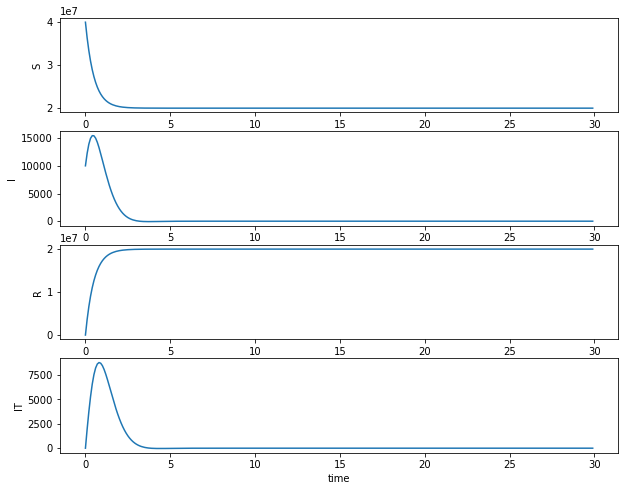

In [5]:
import matplotlib.pyplot  as plt
from numpy import array,zeros,arange

def SIR(state,t):
    S=state[0]
    I=state[1]
    R=state[2]
    IT=state[3]
    ds=-beta*S*(I-IT)/Npop -alfa*S +lambd*R -(beta/2)*S*IT/Npop
    di=beta*S*(I-IT)/Npop-gamma*I-kappa*I+(beta/2)*S*IT/Npop
    dr=gamma*I + alfa*S -lambd*R +epsilon*IT
    dit=kappa*I - epsilon*IT

    return array([ds,di,dr,dit])



def Runge_Kutta(y,t,dt,derivative):
    k1=dt*derivative(y,t)
    k2=dt*derivative(y+k1/2.,t+0.5*dt)
    k3=dt*derivative(y+k2/2.,t+0.5*dt)
    k4=dt*derivative(y+k3,t+dt)
    y_next=y+1/6.*(k1+2*k2+2*k3+k4)
    return y_next

global alfa,beta,gamma,lambd,Npop,kappa,epsilon
kappa=2  #rozpoczecie leczenia
epsilon=3 #zdrowienie2
lambd=1 #utrata odpornosci
alfa=1 #szczepionka
beta=5.5 #zachorowalnosc
gamma=1 #zdrowienie
Npop=4*10**7
Io=10**4  # initial conditions
So=Npop-Io 
Ro=0
dt=0.1
to=0
te=30
ITo=0
t=arange(to,te,dt)
N=len(t)
y=zeros([N,4])
y[0,0]=So
y[0,1]=Io
y[0,2]=Ro
y[0,3]=ITo

for i in range(N-1):
    y[i+1]=Runge_Kutta(y[i],t[i],dt,SIR)

St=[y[j,0] for j in range(N)]
It=[y[j,1] for j in range(N)]
Rt=[y[j,2] for j in range(N)]
ITt=[y[j,3] for j in range(N)]

plt.figure(figsize = (10,8))
plt.subplot(4,1,1)
plt.plot(t,St)
plt.ylabel("S")
plt.xlabel("time")
plt.subplot(4,1,2)
plt.plot(t,It)
plt.ylabel("I")
plt.xlabel("time")
plt.subplot(4,1,3)
plt.plot(t,Rt)
plt.ylabel("R")
plt.xlabel("time")
plt.subplot(4,1,4)
plt.plot(t,ITt)
plt.ylabel("IT")
plt.xlabel("time")
plt.show()


It can be seen that in this model the epidemic is progressing at a different pace. The fact that treated people do not infect as much as untreated affects the epidemic strongly. Its course is milder, and with the possibility of vaccinating disabled, up to 2 million ill people.

## Part 6. Drug resistance

To analyze the case of the strain's resistance to drugs, I introduce the TR compartment - these are treated people, but due to the strain's resistance, they recover at the same rate as untreated people. The TR range has the same coefficients as IT, however they have different values. The IT range includes an additional factor - it is time dependent, so that as time increases, the strain acquires drug resistance and the treatment rate decreases.

$dS=\frac{-\beta*S*(I-IT)}{N_{pop}} - \frac{\frac{\beta}{2}*S*IT}{N_{pop}} - \alpha*S + \lambda*R$ 

$dI=\frac{\beta*S*(I-IT)}{N_{pop}} + \frac{\frac{\beta}{2}*S*IT}{N_{pop}} - \gamma*I - \kappa1*I- \kappa2*I$

$dR=\gamma*I + \alpha*S - \lambda*R + \frac{\epsilon1}{t+1}*IT + \epsilon2*IT$

$dIT=\kappa1*I - \frac{\epsilon1}{t+1}*IT$

$dTR=\kappa2*I - \epsilon2*TR$

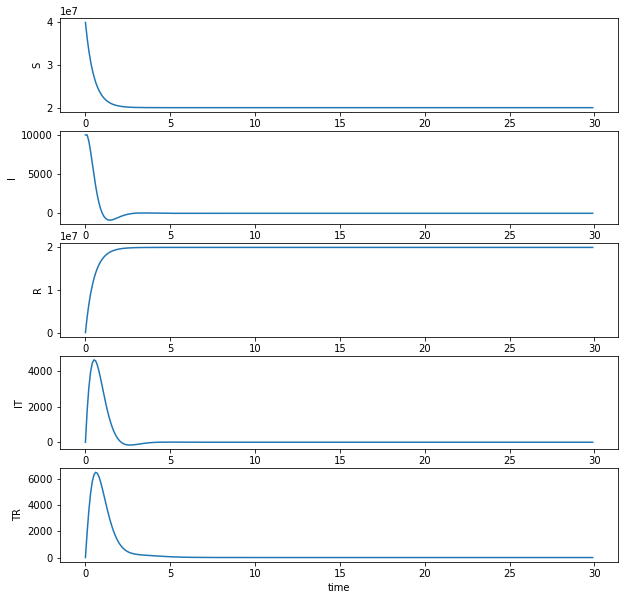

In [6]:
import matplotlib.pyplot  as plt
from numpy import array,zeros,arange

def SIR(state,t):
    S=state[0]
    I=state[1]
    R=state[2]
    IT=state[3]
    TR=state[4]
    ds=-beta*S*(I-IT)/Npop -alfa*S +lambd*R -(beta/2)*S*IT/Npop
    di=beta*S*(I-IT)/Npop-gamma*I-kappa1*I+(beta/2)*S*IT/Npop- kappa2*I
    dr=gamma*I + alfa*S -lambd*R +epsilon1/(t+1)*IT +epsilon2*TR
    dit=kappa1*I - epsilon1/(t+1)*IT
    dtr=kappa2*I - epsilon2*TR 

    return array([ds,di,dr,dit,dtr])



def Runge_Kutta(y,t,dt,derivative):
    k1=dt*derivative(y,t)
    k2=dt*derivative(y+k1/2.,t+0.5*dt)
    k3=dt*derivative(y+k2/2.,t+0.5*dt)
    k4=dt*derivative(y+k3,t+dt)
    y_next=y+1/6.*(k1+2*k2+2*k3+k4)
    return y_next

global alfa,beta,gamma,lambd,Npop,kappa1,epsilon1,kappa2,epsilon2

kappa1=2 
epsilon1=3 
kappa2=2 
epsilon2=1
lambd=1 
alfa=1 
beta=5.5 
gamma=1 
Npop=4*10**7
Io=10**4 
So=Npop-Io 
Ro=0
dt=0.1
to=0
te=30
ITo=0
TRo=0
t=arange(to,te,dt)
N=len(t)
y=zeros([N,5])
y[0,0]=So
y[0,1]=Io
y[0,2]=Ro
y[0,3]=ITo
y[0,4]=TRo

for i in range(N-1):
    y[i+1]=Runge_Kutta(y[i],t[i],dt,SIR)

St=[y[j,0] for j in range(N)]
It=[y[j,1] for j in range(N)]
Rt=[y[j,2] for j in range(N)]
ITt=[y[j,3] for j in range(N)]
TRt=[y[j,4] for j in range(N)]

plt.figure(figsize = (10,10))
plt.subplot(5,1,1)
plt.plot(t,St)
plt.ylabel("S")
plt.xlabel("time")
plt.subplot(5,1,2)
plt.plot(t,It)
plt.ylabel("I")
plt.xlabel("time")
plt.subplot(5,1,3)
plt.plot(t,Rt)
plt.ylabel("R")
plt.xlabel("time")
plt.subplot(5,1,4)
plt.plot(t,ITt)
plt.ylabel("IT")
plt.xlabel("time")
plt.subplot(5,1,5)
plt.plot(t,TRt)
plt.ylabel("TR")
plt.xlabel("time")
plt.show()


The introduction of the compartment did not affect the course of the epidemic. Drugs and vaccinations continue to bring the epidemic to an end. In this version of the model, I do not assume the patient will die if untreated or drug resistant.

### Part 7. Birth and death.

In the last part, I introduce birth and death to society. I assume 1,000 people are born every day and 999 die. Additionally, untreated and treated but drug-resistant people die. I also assume that the bacterial strain acquires drug resistance over time. In order to verify the correctness of the equations, I introduce part D- it will contain the number of deaths.

$dS=\frac{-\beta*S*(I-IT)}{N_{pop}} - \frac{\frac{\beta}{2}*S*IT}{N_{pop}} - \alpha*S + \lambda*R +1000$

$dI=\frac{\beta*S*(I-IT)}{N_{pop}} + \frac{\frac{\beta}{2}*S*IT}{N_{pop}} - \gamma*I - \kappa1*I- \kappa2*I$

$dR=\alpha*S - \lambda*R + \frac{\epsilon1}{t+1}*IT  - 999$

$dIT=\kappa1*I - \frac{\epsilon1}{t+1}*IT$

$dTR=\kappa2*I - \epsilon2*TR$

$dD=999 + \epsilon2*TR + \gamma*I$

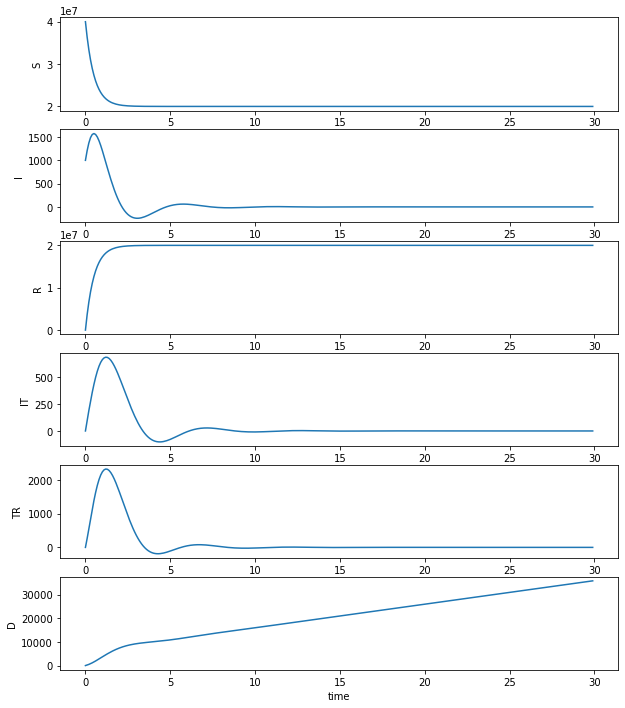

In [7]:
import matplotlib.pyplot  as plt
from numpy import array,zeros,arange

def SIR(state,t):
    S=state[0]
    I=state[1]
    R=state[2]
    IT=state[3]
    TR=state[4]
    D=state[5]
    ds=-beta*S*(I-IT)/Npop -alfa*S +lambd*R -(beta/2)*S*IT/Npop +1000
    di=beta*S*(I-IT)/Npop-gamma*I-kappa1*I+(beta/2)*S*IT/Npop- kappa2*I/2
    dr=alfa*S -lambd*R +epsilon1/(t+1)*IT -999
    dit=kappa1*I - epsilon1/(t+1)*IT
    dtr=kappa2*I - epsilon2*TR 
    dd=999+epsilon2*TR+gamma*I
    return array([ds,di,dr,dit,dtr,dd])



def Runge_Kutta(y,t,dt,derivative):
    k1=dt*derivative(y,t)
    k2=dt*derivative(y+k1/2.,t+0.5*dt)
    k3=dt*derivative(y+k2/2.,t+0.5*dt)
    k4=dt*derivative(y+k3,t+dt)
    y_next=y+1/6.*(k1+2*k2+2*k3+k4)
    return y_next

global alfa,beta,gamma,lambd,Npop,kappa1,epsilon1,kappa2,epsilon2

kappa1=1  #rozpoczecie leczenia
epsilon1=3 #zdrowienie2(nabywanie lekoodpornosci)
kappa2=2.5 #rozpoczecie leczenia ale odpornosc
epsilon2=1 #zdrowienie (tak jak nieleczeni)
lambd=1 #utrata odpornosci
alfa=1 #szczepionka
beta=5.5 #zachorowalnosc
gamma=1 #zdrowienie
Npop=4*10**7
Io=10**3 # initial conditions
So=Npop-Io 
Ro=0
dt=0.1
to=0
te=30
ITo=0
TRo=0
Do=0
t=arange(to,te,dt)
N=len(t)
y=zeros([N,6])
y[0,0]=So
y[0,1]=Io
y[0,2]=Ro
y[0,3]=ITo
y[0,4]=TRo
y[0,5]=Do

for i in range(N-1):
    y[i+1]=Runge_Kutta(y[i],t[i],dt,SIR)

St=[y[j,0] for j in range(N)]
It=[y[j,1] for j in range(N)]
Rt=[y[j,2] for j in range(N)]
ITt=[y[j,3] for j in range(N)]
TRt=[y[j,4] for j in range(N)]
Dt=[y[j,5] for j in range(N)]
plt.figure(figsize = (10,12))
plt.subplot(6,1,1)
plt.plot(t,St)
plt.ylabel("S")
plt.xlabel("time")
plt.subplot(6,1,2)
plt.plot(t,It)
plt.ylabel("I")
plt.xlabel("time")
plt.subplot(6,1,3)
plt.plot(t,Rt)
plt.ylabel("R")
plt.xlabel("time")
plt.subplot(6,1,4)
plt.plot(t,ITt)
plt.ylabel("IT")
plt.xlabel("time")
plt.subplot(6,1,5)
plt.plot(t,TRt)
plt.ylabel("TR")
plt.xlabel("time")
plt.subplot(6,1,6)
plt.plot(t,Dt)
plt.ylabel("D")
plt.xlabel("time")
plt.show()


The developed SIR model fully illustrates the course of the epidemic. With appropriate settings of indicators, we can simulate the course of the epidemic for a given disease and ways to fight it. We can predict to what extent vaccinations or medications should be introduced so that the epidemic ends as soon as possible.